In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
#from sklearn import metrics, cross_validation
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
adv_works_cust = pd.read_csv('AdvWorksCusts.csv')
adv_works_cust.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399


In [3]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100000)

In [4]:
(adv_works_cust.astype(np.object) == '?').any()

CustomerID              False
Title                   False
FirstName               False
MiddleName              False
LastName                False
Suffix                  False
AddressLine1            False
AddressLine2            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [5]:
adv_works_cust.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [6]:
adv_works_cust.drop('Suffix', axis = 1, inplace = True)

In [7]:
adv_works_cust.shape

(16519, 22)

In [8]:
cols = ['Title','AddressLine2','MiddleName']
for column in cols:
    adv_works_cust[column] = adv_works_cust[column].replace(r'\s+', np.nan, regex=True)
    adv_works_cust[column] = adv_works_cust[column].fillna('NA')
   

In [9]:
adv_works_cust.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NA,Jon,V,Yang,3761 N. 14th St,NA,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NA,Eugene,L,Huang,2243 W St.,NA,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NA,Ruben,NA,Torres,5844 Linden Land,NA,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NA,Christy,NA,Zhu,1825 Village Pl.,NA,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NA,Elizabeth,NA,Johnson,7553 Harness Circle,NA,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
5,11005,NA,Julio,NA,Ruiz,7305 Humphrey Drive,NA,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199
6,11006,NA,Janet,G,Alvarez,2612 Berry Dr,NA,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
7,11007,NA,Marco,NA,Mehta,942 Brook Street,NA,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759
8,11008,NA,Rob,NA,Verhoff,624 Peabody Road,NA,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005
9,11009,NA,Shannon,C,Carlson,3839 Northgate Road,NA,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399


In [10]:
print(adv_works_cust.shape)
print(adv_works_cust.CustomerID.unique().shape)

(16519, 22)
(16404,)


In [11]:
adv_works_cust.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(adv_works_cust.shape)
print(adv_works_cust.CustomerID.unique().shape)

(16404, 22)
(16404,)


In [12]:
adv_works_cust.to_csv('AdvWorksCustsPrepared.csv',index=False,header=True)

In [13]:
adv_works_avg_month_spend = pd.read_csv('AW_AveMonthSpend.csv')
adv_works_avg_month_spend.head(20)

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95
5,11005,78
6,11006,54
7,11007,130
8,11008,85
9,11009,74


In [14]:
cols = ['AveMonthSpend']
for column in cols:
    adv_works_avg_month_spend[column] = adv_works_avg_month_spend[column].replace(r'\s+', np.nan, regex=True)
    
    

In [15]:
count = 0
count = [count + 1 for x in adv_works_avg_month_spend['AveMonthSpend'] if x == np.nan]
sum(count)  

0

hence no missing values

In [16]:
print(adv_works_avg_month_spend.shape)
print(adv_works_avg_month_spend.CustomerID.unique().shape)

(16519, 2)
(16404,)


In [17]:
adv_works_avg_month_spend.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(adv_works_avg_month_spend.shape)
print(adv_works_avg_month_spend.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [18]:
adv_works_avg_month_spend.to_csv('AW_AveMonthSpendPrepared.csv',index=False,header=True)

In [19]:
adv_works_bike_buyer = pd.read_csv('AW_BikeBuyer.csv')
adv_works_bike_buyer.head(20)

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1
5,11005,1
6,11006,1
7,11007,1
8,11008,1
9,11009,0


In [20]:
cols = ['BikeBuyer']
for column in cols:
    adv_works_bike_buyer[column] = adv_works_bike_buyer[column].replace(r'\s+', np.nan, regex=True)

count = 0
count = [count + 1 for x in adv_works_bike_buyer['BikeBuyer'] if x == np.nan]
sum(count)  

0

In [21]:
print(adv_works_bike_buyer.shape)
print(adv_works_bike_buyer.CustomerID.unique().shape)

(16519, 2)
(16404,)


In [22]:
adv_works_bike_buyer.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(adv_works_bike_buyer.shape)
print(adv_works_bike_buyer.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [23]:
adv_works_bike_buyer.to_csv('AW_BikeBuyerPrepared.csv',index=False,header=True)

In [24]:
adv_works_avg_month_spend = pd.read_csv('AW_AveMonthSpendPrepared.csv')
adv_works_avg_month_spend['AveMonthSpend'].describe()

count    16404.000000
mean        72.391002
std         27.269921
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

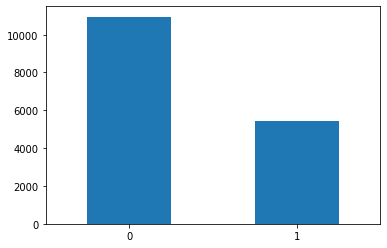

In [25]:
adv_works_bike_buyer  = pd.read_csv('AW_BikeBuyerPrepared.csv')
k = adv_works_bike_buyer['BikeBuyer'].value_counts().plot.bar(rot=0)

In [26]:
adv_works_cust = pd.read_csv('AdvWorksCustsPrepared.csv')

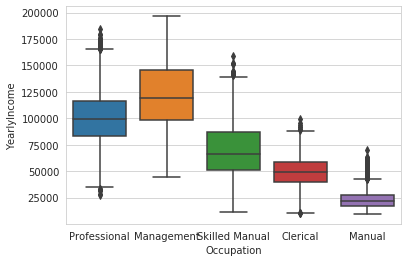

In [27]:
def plot_box(adv_works_cust, cols, col_y = 'YearlyIncome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=adv_works_cust)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['Occupation']
plot_box(adv_works_cust, cat_cols) 

In [28]:
print(adv_works_cust.BirthDate.dtypes)
adv_works_cust['CollectionDate'] = '1998-01-01'
print(adv_works_cust.CollectionDate.dtypes)

adv_works_cust['CollectionDate'] = pd.to_datetime(adv_works_cust['CollectionDate'])
adv_works_cust['BirthDate'] = pd.to_datetime(adv_works_cust['BirthDate'])
#adv_works_cust.dtypes
adv_works_cust['Age'] = (np.floor((adv_works_cust['CollectionDate']-adv_works_cust['BirthDate']).dt.days/365.25))   #it works in python 3.6 not python 3.0

object
object


In [29]:
adv_works_cust_join_avg_month_spend = adv_works_cust.join(adv_works_avg_month_spend.set_index('CustomerID'), on='CustomerID')
adv_works_cust_join_avg_month_spend.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CollectionDate,Age,AveMonthSpend
0,11000,NaN,Jon,V,Yang,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,1998-01-01,31.0,89
1,11001,NaN,Eugene,L,Huang,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1998-01-01,32.0,117
2,11002,NaN,Ruben,NaN,Torres,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,1998-01-01,32.0,123
3,11003,NaN,Christy,NaN,Zhu,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,1998-01-01,29.0,50
4,11004,NaN,Elizabeth,NaN,Johnson,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1998-01-01,29.0,95
5,11005,NaN,Julio,NaN,Ruiz,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199,1998-01-01,32.0,78
6,11006,NaN,Janet,G,Alvarez,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756,1998-01-01,32.0,54
7,11007,NaN,Marco,NaN,Mehta,942 Brook Street,NaN,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759,1998-01-01,33.0,130
8,11008,NaN,Rob,NaN,Verhoff,624 Peabody Road,NaN,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005,1998-01-01,33.0,85
9,11009,NaN,Shannon,C,Carlson,3839 Northgate Road,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399,1998-01-01,33.0,74


In [30]:
def age_category(df):
    if(df['Age']<25):
        return '<25'
    elif(df['Age']>=25 and df['Age']<=45):
        return '25-45'
    elif(df['Age']>=45 and df['Age']<=55):
        return '45-55'
    else:
        return '>55'



adv_works_cust_join_avg_month_spend['Age_Category'] = adv_works_cust_join_avg_month_spend.apply(age_category,axis=1)

In [31]:
adv_works_cust_join_avg_month_spend.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CollectionDate,Age,AveMonthSpend,Age_Category
0,11000,NaN,Jon,V,Yang,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,1998-01-01,31.0,89,25-45
1,11001,NaN,Eugene,L,Huang,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1998-01-01,32.0,117,25-45
2,11002,NaN,Ruben,NaN,Torres,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,1998-01-01,32.0,123,25-45
3,11003,NaN,Christy,NaN,Zhu,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,1998-01-01,29.0,50,25-45
4,11004,NaN,Elizabeth,NaN,Johnson,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1998-01-01,29.0,95,25-45
5,11005,NaN,Julio,NaN,Ruiz,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199,1998-01-01,32.0,78,25-45
6,11006,NaN,Janet,G,Alvarez,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756,1998-01-01,32.0,54,25-45
7,11007,NaN,Marco,NaN,Mehta,942 Brook Street,NaN,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759,1998-01-01,33.0,130,25-45
8,11008,NaN,Rob,NaN,Verhoff,624 Peabody Road,NaN,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005,1998-01-01,33.0,85,25-45
9,11009,NaN,Shannon,C,Carlson,3839 Northgate Road,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399,1998-01-01,33.0,74,25-45


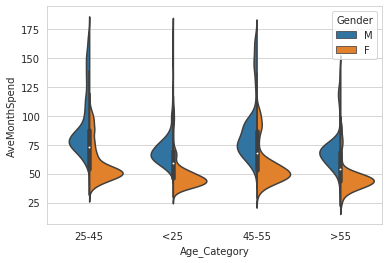

In [32]:
def plot_violin_hue(adv_works_cust_join_avg_month_spend, cols, col_y = 'AveMonthSpend', hue_col = 'Gender'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=adv_works_cust_join_avg_month_spend, hue = hue_col, split = True)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin_hue(adv_works_cust_join_avg_month_spend, ['Age_Category'])  

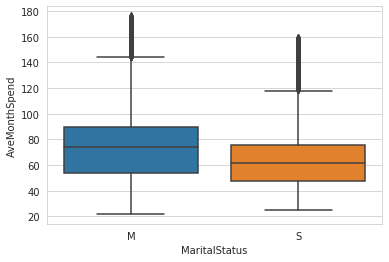

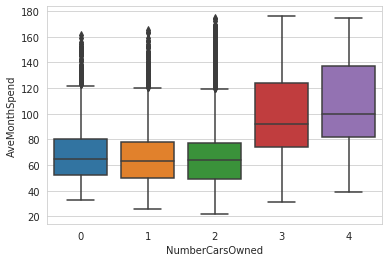

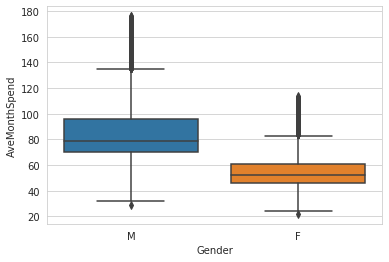

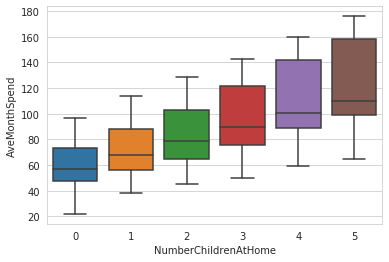

In [33]:
def plot_box(adv_works_cust_join_avg_month_spend, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=adv_works_cust_join_avg_month_spend)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['MaritalStatus','NumberCarsOwned','Gender','NumberChildrenAtHome']
plot_box(adv_works_cust_join_avg_month_spend, cat_cols) 

In [34]:
adv_works_cust_join_bike_buyer = adv_works_cust.join(adv_works_bike_buyer.set_index('CustomerID'), on='CustomerID')
adv_works_cust_join_bike_buyer.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CollectionDate,Age,BikeBuyer
0,11000,NaN,Jon,V,Yang,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,1998-01-01,31.0,0
1,11001,NaN,Eugene,L,Huang,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1998-01-01,32.0,1
2,11002,NaN,Ruben,NaN,Torres,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,1998-01-01,32.0,0
3,11003,NaN,Christy,NaN,Zhu,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,1998-01-01,29.0,0
4,11004,NaN,Elizabeth,NaN,Johnson,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1998-01-01,29.0,1
5,11005,NaN,Julio,NaN,Ruiz,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199,1998-01-01,32.0,1
6,11006,NaN,Janet,G,Alvarez,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756,1998-01-01,32.0,1
7,11007,NaN,Marco,NaN,Mehta,942 Brook Street,NaN,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759,1998-01-01,33.0,1
8,11008,NaN,Rob,NaN,Verhoff,624 Peabody Road,NaN,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005,1998-01-01,33.0,1
9,11009,NaN,Shannon,C,Carlson,3839 Northgate Road,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399,1998-01-01,33.0,0


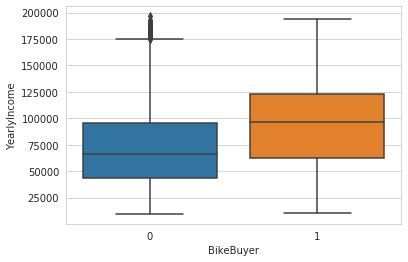

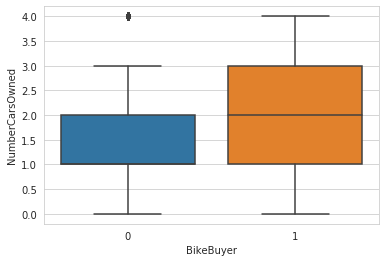

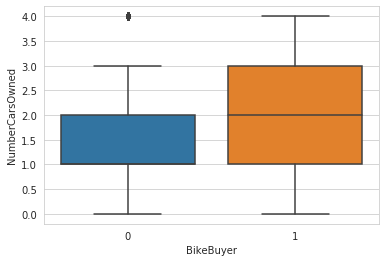

In [35]:
cat_cols = ['BikeBuyer']
plot_box(adv_works_cust_join_bike_buyer, cat_cols,'YearlyIncome') 
plot_box(adv_works_cust_join_bike_buyer, cat_cols,'NumberCarsOwned') 
plot_box(adv_works_cust_join_bike_buyer, cat_cols,'NumberCarsOwned') 

In [36]:
adv_works_cust_join_bike_buyer['dummy'] = np.ones(shape = adv_works_cust_join_bike_buyer.shape[0])
counts = adv_works_cust_join_bike_buyer[['dummy', 'BikeBuyer', 'Occupation']].groupby(['BikeBuyer', 'Occupation'], as_index = False).count()
print(counts)

   BikeBuyer      Occupation  dummy
0          0        Clerical   1981
1          0      Management   1702
2          0          Manual   1625
3          0    Professional   2738
4          0  Skilled Manual   2903
5          1        Clerical    616
6          1      Management   1016
7          1          Manual    504
8          1    Professional   2184
9          1  Skilled Manual   1135


In [37]:
counts = adv_works_cust_join_bike_buyer[['dummy', 'BikeBuyer', 'Gender']].groupby(['BikeBuyer', 'Gender'], as_index = False).count()
print(counts)

   BikeBuyer Gender  dummy
0          0      F   5881
1          0      M   5068
2          1      F   2233
3          1      M   3222


In [38]:
counts = adv_works_cust_join_bike_buyer[['dummy', 'BikeBuyer', 'MaritalStatus']].groupby(['BikeBuyer', 'MaritalStatus'], as_index = False).count()
print(counts)

   BikeBuyer MaritalStatus  dummy
0          0             M   6653
1          0             S   4296
2          1             M   2199
3          1             S   3256


In [39]:
adv_works_cust.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CollectionDate,Age
0,11000,NaN,Jon,V,Yang,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,1998-01-01,31.0
1,11001,NaN,Eugene,L,Huang,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1998-01-01,32.0
2,11002,NaN,Ruben,NaN,Torres,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,1998-01-01,32.0
3,11003,NaN,Christy,NaN,Zhu,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,1998-01-01,29.0
4,11004,NaN,Elizabeth,NaN,Johnson,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1998-01-01,29.0
5,11005,NaN,Julio,NaN,Ruiz,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199,1998-01-01,32.0
6,11006,NaN,Janet,G,Alvarez,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756,1998-01-01,32.0
7,11007,NaN,Marco,NaN,Mehta,942 Brook Street,NaN,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759,1998-01-01,33.0
8,11008,NaN,Rob,NaN,Verhoff,624 Peabody Road,NaN,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005,1998-01-01,33.0
9,11009,NaN,Shannon,C,Carlson,3839 Northgate Road,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399,1998-01-01,33.0


In [40]:
#adv_works_cust_join_avg_month_spend[['Age_Category']]
Feature1 = adv_works_cust[['CountryRegionName','Education','Occupation','Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome']]
Feature2 = adv_works_cust_join_avg_month_spend[['Age_Category']]
adv_works_cust_features = pd.concat([Feature2,Feature1],axis=1,ignore_index=False)

In [41]:
def Uniqueness_in_Column(cols):
    for col in cols:
        print(adv_works_cust_features[col].unique())
    
cols = ['Age_Category','CountryRegionName', 'Education', 'Occupation', 
                       'Gender', 'MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren']    
Uniqueness_in_Column(cols)

['25-45' '<25' '45-55' '>55']
['Australia' 'United States' 'Canada' 'Germany' 'United Kingdom' 'France']
['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
[1 0]
[0 1 4 2 3]
[0 3 5 4 1 2]
[2 3 0 5 4 1]


In [42]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['CountryRegionName', 'Education', 'Occupation', 
                       'Gender', 'MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren']

Features = encode_string(adv_works_cust_features['Age_Category'])
for col in categorical_columns:
    temp = encode_string(adv_works_cust_features[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In c

(16404, 43)
[[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
  0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]]


/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In c

In [43]:
Features = np.concatenate([Features, np.array(adv_works_cust_features[['YearlyIncome']])], axis = 1)
Features[:2,:]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.37947e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.0

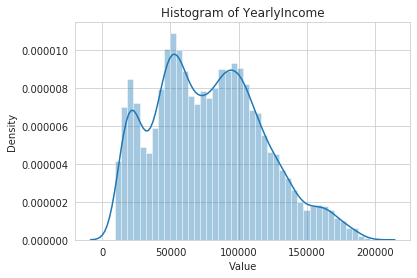

In [44]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(adv_works_cust_features['YearlyIncome'], 'YearlyIncome')

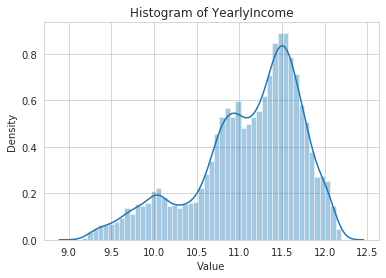

In [45]:
adv_works_cust_features['log_YearlyIncome'] = np.log(adv_works_cust_features['YearlyIncome'])
hist_plot(adv_works_cust_features['log_YearlyIncome'], 'YearlyIncome')

We cannnot take the log of yearly income because as the above graph shows that 'logYearlyIncome' is strong left skewed as compaire to 'YearlyIncome' which is moderately right skewed.

In [46]:
del adv_works_cust_features['log_YearlyIncome']

In [47]:
Features[:,43].reshape(-1,1)

array([[137947.],
       [101141.],
       [ 91945.],
       ...,
       [133053.],
       [ 31930.],
       [ 59382.]])

In [48]:
scaler = preprocessing.StandardScaler().fit(Features[:,43].reshape(-1,1))
Features[:,43] = scaler.transform(Features[:,43].reshape(-1,1)).reshape(-1)
print(Features.shape)
Features[:5,:]

(16404, 44)


array([[1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.50570312],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0. 

In [49]:
adv_works_bike_buyer  = pd.read_csv('AW_BikeBuyerPrepared.csv')
labels = np.array(adv_works_bike_buyer['BikeBuyer'])
labels.shape

(16404,)

In [50]:
## Randomly sample cases to create independent training and test data
nr.seed(1122)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])


In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11482, 44)
(11482,)
(4922, 44)
(4922,)


In [52]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.17544424]
[[ 1.07268746e+00 -5.96940453e-02  6.43153508e-01 -1.83159116e+00
  -9.94292769e-02 -6.84962697e-02 -8.07135602e-02  5.35335427e-02
   1.21046625e-01 -1.01385297e-01  1.51861645e-01  1.39411994e-01
  -1.78022893e-01  2.58113531e-02 -3.14506336e-01 -1.09379795e-01
  -6.34323589e-02 -2.56301980e-01  1.70112135e-01  8.35577635e-02
  -4.73898772e-01  2.98454535e-01 -9.12497907e-01  7.37053671e-01
  -1.56752956e-01 -1.86912803e-02 -1.16639620e-01 -6.86679271e-02
  -1.20986486e-01  1.30804406e-01  4.53902382e-05 -1.88530352e+00
  -9.96167733e-01 -2.35127777e-02  6.69403494e-01  5.85886548e-01
   1.47424975e+00  5.44611934e-02  1.92798279e-01 -2.75101475e-01
  -2.08421690e-01  9.27011193e-02 -3.18816630e-02  3.61384045e-01]]


In [54]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.52208033 0.47791967]
 [0.99315816 0.00684184]
 [0.91678922 0.08321078]
 [0.8629463  0.1370537 ]
 [0.44307346 0.55692654]
 [0.41466085 0.58533915]
 [0.84016279 0.15983721]
 [0.1978939  0.8021061 ]
 [0.8459705  0.1540295 ]
 [0.25548157 0.74451843]
 [0.8143862  0.1856138 ]
 [0.96775008 0.03224992]
 [0.79884923 0.20115077]
 [0.81620197 0.18379803]
 [0.86517694 0.13482306]]


In [55]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 1 1 0 1 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0 1 0 1 1 0]


In [56]:
from collections import Counter

print(Counter(y_test).keys()) # equals to list(set(y_test))
Counter(y_test).values() # counts the elements' frequency

dict_keys([0, 1])


dict_values([3306, 1616])

Here 1-> shows bike buying people and 0-> shows not bike buying people

In [57]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2938               368
Actual negative       656               960

Accuracy  0.79
 
           Positive      Negative
Num case     3306          1616
Precision    0.82          0.72
Recall       0.89          0.59
F1           0.85          0.65


# Positive => 0 => (not bike buying)  ,   Negetive => 1 => (bike buying people)
                                   
                                        Scored Positive                Scored Negative
                     ------------------------------------------------------------------                   
                      Actual Positive   True Positive                  False Negative
                      Actual Negative   False Positive                 True Negative
                    
Here, 
True Positive or TP = (not bike buying) label with correctly classified as (not buying bike)
True Negetive or TN = (bike buying) label with correctly classified as (buying bike)
False Positive or FP = (bike buying) label with incorrectly classified as (not buying bike)
False Negetive or FN = (not bike buying) label with incorrectly classified as (buying bike)

So, i want to work on FP because 

   (Jo mere customer bike kharidne wale hai ussi ko incorrect classify karenga tho mai apna sales kaise badaunga. Agar mai sucho ki jo         bike nahi karidhne wala hai but model usko right predict kar raha hai tho thoda soch sakte hai but yaha par both positive and             negetive or (not buying and buying) correctly classify hona important hai).

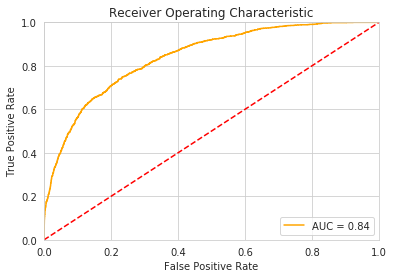

In [58]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  

In [59]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.4, 1:0.6}) 
logistic_mod.fit(X_train, y_train)

/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.42239831 0.57760169]
 [0.98857285 0.01142715]
 [0.87647934 0.12352066]
 [0.80651999 0.19348001]
 [0.34784331 0.65215669]
 [0.32368629 0.67631371]
 [0.76766707 0.23233293]
 [0.14298295 0.85701705]
 [0.78411488 0.21588512]
 [0.192457   0.807543  ]
 [0.74218726 0.25781274]
 [0.95286052 0.04713948]
 [0.72976891 0.27023109]
 [0.7489854  0.2510146 ]
 [0.81146141 0.18853859]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive      2750               556
Actual negative       539              1077

Accuracy  0.78
 
           Positive      Negative
Num case     3306          1616
Precision    0.84          0.66
Recall       0.83          0.67
F1           0.83          0.66


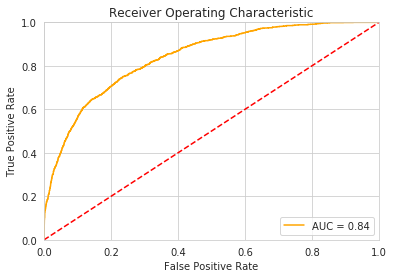

In [61]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)
plot_auc(y_test, probabilities) 

In [62]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2620               686
Actual negative       462              1154

Accuracy  0.77
 
           Positive      Negative
Num case     3306          1616
Precision    0.85          0.63
Recall       0.79          0.71
F1           0.82          0.67

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2467               839
Actual negative       382              1234

Accuracy  0.75
 
           Positive      Negative
Num case     3306          1616
Precision    0.87          0.60
Recall       0.75          0.76
F1           0.80          0.67

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2308               998
Actual negative       323              1293

Accuracy  0.73
 
           Positive      Negative
Num cas

Let's take threshold = 0.4

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2467               839
Actual negative       382              1234

Accuracy  0.75
 
           Positive      Negative
Num case     3306          1616
Precision    0.87          0.60
Recall       0.75          0.76
F1           0.80          0.67


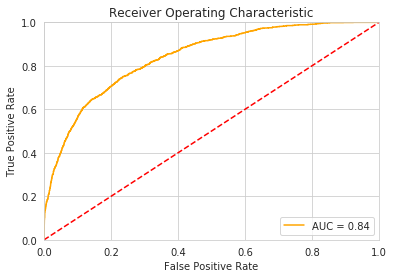

In [63]:
scores = score_model(probabilities, 0.4)
print_metrics(y_test, scores)
plot_auc(y_test, probabilities) 

In [64]:
adv_works_cust_test = pd.read_csv('AW_test.csv')
adv_works_cust_test

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876
5,16375,NaN,Gabriella,NaN,Hernandez,NaN,5689 Almondtree Circle,NaN,Spring Valley,California,United States,91977,165-555-0161,8/23/1957,Partial College,Clerical,F,M,1,1,0,1,44467
6,16109,NaN,Adam,K,Turner,NaN,9800 American Beauty Dr.,NaN,N. Vancouver,British Columbia,Canada,V7L 4J4,222-555-0116,7/5/1964,Bachelors,Skilled Manual,M,S,1,2,2,4,77702
7,15606,NaN,Marco,C,Prasad,NaN,8523 Rose Drive,C,Cranbourne,Victoria,Australia,3977,1 (11) 500 555-0165,12/11/1964,Bachelors,Professional,M,M,1,3,4,4,99418
8,20888,NaN,Clayton,P,Raje,NaN,"4, place du Tertre",NaN,Tremblay-en-France,Seine Saint Denis,France,93290,1 (11) 500 555-0188,1/21/1966,Partial High School,Manual,M,S,1,1,4,4,13522
9,20716,NaN,Kristina,V,Arun,NaN,Waldstr 29,NaN,Hannover,Nordrhein-Westfalen,Germany,30601,1 (11) 500 555-0186,9/13/1973,Bachelors,Skilled Manual,F,M,1,1,1,1,46264


In [65]:
print(adv_works_cust_test.BirthDate.dtypes)
adv_works_cust_test['CollectionDate'] = '1998-01-01'
print(adv_works_cust.CollectionDate.dtypes)

adv_works_cust_test['CollectionDate'] = pd.to_datetime(adv_works_cust_test['CollectionDate'])
adv_works_cust_test['BirthDate'] = pd.to_datetime(adv_works_cust_test['BirthDate'])
#adv_works_cust.dtypes
adv_works_cust_test['Age'] = (np.floor((adv_works_cust_test['CollectionDate']-adv_works_cust_test['BirthDate']).dt.days/365.25))   #it works in python 3.6 not python 3.0

object
datetime64[ns]


In [66]:
adv_works_cust_test.head(20)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CollectionDate,Age
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,1945-01-05,Bachelors,Management,F,S,0,2,0,5,86931,1998-01-01,52.0
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,1964-10-04,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,1998-01-01,33.0
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,1934-01-12,Graduate Degree,Management,F,M,1,2,0,4,103985,1998-01-01,63.0
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,1958-09-22,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,1998-01-01,39.0
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,1965-03-19,High School,Manual,F,M,1,1,2,2,21876,1998-01-01,32.0
5,16375,NaN,Gabriella,NaN,Hernandez,NaN,5689 Almondtree Circle,NaN,Spring Valley,California,United States,91977,165-555-0161,1957-08-23,Partial College,Clerical,F,M,1,1,0,1,44467,1998-01-01,40.0
6,16109,NaN,Adam,K,Turner,NaN,9800 American Beauty Dr.,NaN,N. Vancouver,British Columbia,Canada,V7L 4J4,222-555-0116,1964-07-05,Bachelors,Skilled Manual,M,S,1,2,2,4,77702,1998-01-01,33.0
7,15606,NaN,Marco,C,Prasad,NaN,8523 Rose Drive,C,Cranbourne,Victoria,Australia,3977,1 (11) 500 555-0165,1964-12-11,Bachelors,Professional,M,M,1,3,4,4,99418,1998-01-01,33.0
8,20888,NaN,Clayton,P,Raje,NaN,"4, place du Tertre",NaN,Tremblay-en-France,Seine Saint Denis,France,93290,1 (11) 500 555-0188,1966-01-21,Partial High School,Manual,M,S,1,1,4,4,13522,1998-01-01,31.0
9,20716,NaN,Kristina,V,Arun,NaN,Waldstr 29,NaN,Hannover,Nordrhein-Westfalen,Germany,30601,1 (11) 500 555-0186,1973-09-13,Bachelors,Skilled Manual,F,M,1,1,1,1,46264,1998-01-01,24.0


In [67]:
adv_works_cust_test['Age_Category'] = adv_works_cust_test.apply(age_category,axis=1)

In [68]:
#adv_works_cust_join_avg_month_spend[['Age_Category']]
test_feature = adv_works_cust_test[['Age_Category','CountryRegionName','Education','Occupation','Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome']]
test_feature.head(20)

,Age_Category,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,45-55,United States,Bachelors,Management,F,S,0,2,0,5,86931
1,25-45,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,>55,United States,Graduate Degree,Management,F,M,1,2,0,4,103985
3,25-45,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,25-45,France,High School,Manual,F,M,1,1,2,2,21876
5,25-45,United States,Partial College,Clerical,F,M,1,1,0,1,44467
6,25-45,Canada,Bachelors,Skilled Manual,M,S,1,2,2,4,77702
7,25-45,Australia,Bachelors,Professional,M,M,1,3,4,4,99418
8,25-45,France,Partial High School,Manual,M,S,1,1,4,4,13522
9,<25,Germany,Bachelors,Skilled Manual,F,M,1,1,1,1,46264


In [69]:
categorical_columns = ['CountryRegionName', 'Education', 'Occupation', 
                       'Gender', 'MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren']

Features_test = encode_string(test_feature['Age_Category'])
for col in categorical_columns:
    temp = encode_string(test_feature[col])
    Features_test = np.concatenate([Features_test, temp], axis = 1)

print(Features_test.shape)
print(Features_test[:2, :]) 

(500, 43)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In c

In [70]:
Features_test = np.concatenate([Features_test,np.array(adv_works_cust_test[['YearlyIncome']])], axis = 1)
Features_test[:2,:]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 8.69310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.0

In [71]:
scaler = preprocessing.StandardScaler().fit(Features_test[:,43].reshape(-1,1))
Features_test[:,43] = scaler.transform(Features_test[:,43].reshape(-1,1)).reshape(-1)
print(Features_test.shape)
Features_test[:5,:]

(500, 44)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.12653132],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.

In [72]:
probabilities = logistic_mod.predict_proba(Features_test)
print(probabilities[:15,:])

[[0.85315686 0.14684314]
 [0.28123084 0.71876916]
 [0.99055646 0.00944354]
 [0.66634468 0.33365532]
 [0.81980952 0.18019048]
 [0.91633838 0.08366162]
 [0.08499339 0.91500661]
 [0.13957229 0.86042771]
 [0.16257564 0.83742436]
 [0.79511667 0.20488333]
 [0.42275347 0.57724653]
 [0.90193205 0.09806795]
 [0.88977869 0.11022131]
 [0.96732897 0.03267103]
 [0.7628177  0.2371823 ]]


In [73]:
scores = score_model(probabilities, 0.4)
print(scores)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 

In [78]:
df_scores = pd.DataFrame()
df_scores['CustomerID'] = adv_works_cust_test['CustomerID']
df_scores['BikeBuyer'] = pd.DataFrame(scores)
df_scores

,CustomerID,BikeBuyer
0,18988,0
1,29135,1
2,12156,0
3,13749,0
4,27780,0
5,16375,0
6,16109,1
7,15606,1
8,20888,1
9,20716,0


In [79]:
df_scores['BikeBuyer'].value_counts()
df_scores.to_csv('AW_test_result.csv',index=False,header=True)

In [80]:
adv_works_cust_features.head()

,Age_Category,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,25-45,Australia,Bachelors,Professional,M,M,1,0,0,2,137947
1,25-45,Australia,Bachelors,Professional,M,S,0,1,3,3,101141
2,25-45,Australia,Bachelors,Professional,M,M,1,1,3,3,91945
3,25-45,Australia,Bachelors,Professional,F,S,0,1,0,0,86688
4,25-45,Australia,Bachelors,Professional,F,S,1,4,5,5,92771


In [81]:
adv_works_cust_features['YearlyIncome'].describe()

count     16404.000000
mean      78129.672397
std       39728.383493
min        9482.000000
25%       47808.750000
50%       76125.000000
75%      105211.750000
max      196511.000000
Name: YearlyIncome, dtype: float64

In [82]:
adv_works_avg_month_spend  = pd.read_csv('AW_AveMonthSpendPrepared.csv')
labels = np.array(adv_works_avg_month_spend['AveMonthSpend'])
print(labels[:])
print(labels.shape)
mean = np.mean(labels)
std = np.std(labels)
print(mean,std)

[ 89 117 123 ...  79  65  68]
(16404,)
72.39100219458669 27.26909008967292


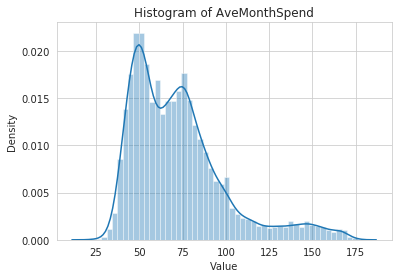

In [83]:
hist_plot(adv_works_avg_month_spend['AveMonthSpend'], 'AveMonthSpend')
#adv_works_avg_month_spend['log_AveMonthSpend'] = np.log(adv_works_avg_month_spend['AveMonthSpend'])
#hist_plot(adv_works_avg_month_spend['log_AveMonthSpend'], 'AveMonthSpend')

In [84]:
#scaler = preprocessing.StandardScaler().fit(labels.reshape(-1,1))
#labels = scaler.transform(labels.reshape(-1,1)).reshape(-1)
#print(labels.shape)
#labels

In [85]:
#hist_plot(labels, 'AveMonthSpend')

In [86]:
Features[:5,:]

array([[1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.50570312],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0. 

In [87]:
## Randomly sample cases to create independent training and test data
nr.seed(1133)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [88]:
print(X_train)
print(y_train)

[[ 0.          0.          1.         ...  0.          0.
  -1.10424854]
 [ 0.          0.          0.         ...  1.          0.
   0.20754882]
 [ 0.          0.          0.         ...  0.          1.
   0.76922987]
 ...
 [ 1.          0.          0.         ...  0.          0.
   0.25560157]
 [ 1.          0.          0.         ...  0.          0.
   0.89861234]
 [ 0.          0.          1.         ...  0.          0.
  -0.28327393]]
[43 46 76 ... 81 53 53]


In [89]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept=False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [90]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-4.13422977e+09 -4.13422977e+09 -4.13422977e+09 -4.13422978e+09
  3.37059634e+12  3.37059634e+12  3.37059634e+12  3.37059634e+12
  3.37059634e+12  3.37059634e+12  1.15774295e+12  1.15774295e+12
  1.15774295e+12  1.15774295e+12  1.15774295e+12 -1.94659514e+11
 -1.94659514e+11 -1.94659514e+11 -1.94659514e+11 -1.94659514e+11
 -1.59161512e+12 -1.59161512e+12 -4.06941220e+12 -4.06941220e+12
  2.26823337e+12  2.26823337e+12 -1.37937304e+11 -1.37937304e+11
 -1.37937304e+11 -1.37937304e+11 -1.37937304e+11 -5.19038868e+11
 -5.19038868e+11 -5.19038867e+11 -5.19038867e+11 -5.19038867e+11
 -5.19038867e+11 -2.79775427e+11 -2.79775427e+11 -2.79775427e+11
 -2.79775427e+11 -2.79775427e+11 -2.79775427e+11  8.04412514e+00]


In [91]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 45)   

Mean Square Error      = 37.63438073622124
Root Mean Square Error = 6.134686686068102
Mean Absolute Error    = 4.675742855017769
Median Absolute Error  = 3.6572265625
R^2                    = 0.9506169015629493
Adjusted R^2           = 0.9501713702258097


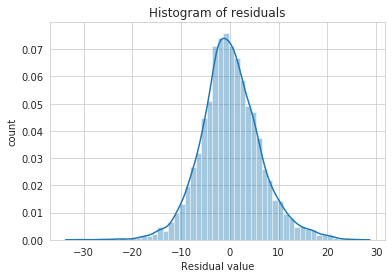

In [92]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)   

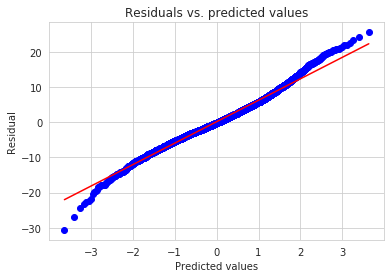

In [93]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

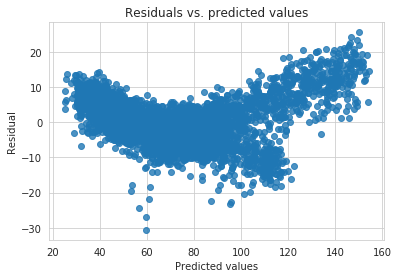

In [94]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [95]:
print(np.round(y_score))

[ 50.  67.  91. ... 110.  43.  65.]


In [96]:
Features_test[:5,:]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.12653132],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.

In [98]:
y_score_test = lin_mod.predict(Features_test)
df_y_score_test = pd.DataFrame()
df_y_score_test['CustomerID'] = adv_works_cust_test['CustomerID']
df_y_score_test['AveMonthSpend'] = pd.DataFrame(np.round(y_score_test))
df_y_score_test.to_csv('AW_AvgMonthSpend_test_result.csv',index=False,header=True)
df_y_score_test
#print_metrics(Features_test, y_score_test, 45)  

,CustomerID,AveMonthSpend
0,18988,42.0
1,29135,106.0
2,12156,46.0
3,13749,88.0
4,27780,60.0
5,16375,45.0
6,16109,95.0
7,15606,126.0
8,20888,103.0
9,20716,53.0
